<a href="https://colab.research.google.com/github/noorsaba5/AI-ML-Data-Cleaning-Exploratory-Analysis-Project/blob/main/AI_ML_Bootcamp_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI/ML Bootcamp Exercise: Data Analysis and Handling
A comprehensive data-preprocessing workflow demonstrating essential techniques used in modern data analytics and machine-learning pipelines. The project focuses on transforming a raw customer dataset into a clean, structured, and analysis-ready format through rigorous data-quality procedures.

# Overview

This project showcases practical, industry-aligned steps for handling real-world datasets, including:

Data loading and structural validation

Duplicate detection and removal

Missing-value analysis and imputation

Outlier identification using statistical thresholds

Winsorisation for treating extreme values

Visualization for distribution and anomaly insights

The workflow follows a systematic approach consistent with professional analytics and ML standards.

# Dataset Description

The dataset represents a small sample of customer information with attributes:

CustomerID

Name

Age

Gender

Annual Income

Spending Score

Initial exploration revealed:

Duplicate customer records

Missing values in both numerical and categorical fields

Potential outliers in income and spending behaviour

## Step 1: Import Libraries

# Technologies & Libraries

pandas –--- data handling

numpy –--- numerical operations

matplotlib –--- visualization

seaborn ---– enhanced statistical plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2: Load the Dataset
Replace the file path below with the location of your `customers.csv` file.

In [ ]:
# Load the dataset
file_path = r'C:\Users\Noor Saba\Dropbox\PC\Downloads\Data Science with Python\customers.csv'
df = pd.read_csv(file_path)

# Quick overview
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

## Step 3: Identify Duplicate Rows

# Methods & Techniques

This project applies well-established, robust techniques, including:

# Data Cleaning

Full schema inspection using pandas utilities

Duplicate detection across all features

Median imputation for numerical gaps

Mode imputation for categorical gaps

# Outlier Management

Outlier detection using the Interquartile Range (IQR) method

Statistical capping (Winsorisation) to manage extreme deviations

Visual diagnostics with boxplots for confirmation

In [ ]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

## Step 4: Handle Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with median
for col in ['Age', 'Annual Income', 'Spending Score']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in ['Gender']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

## Step 5: Detect and Handle Outliers

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers
for col in ['Age', 'Annual Income', 'Spending Score']:
    if col in df.columns:
        outliers = detect_outliers(df[col])
        print(f"{col} outliers:\n{outliers}\n")

# Visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Annual Income', 'Spending Score']])
plt.title('Boxplot for Outlier Detection')
plt.show()

### Handle Outliers using Winsorization

In [ ]:
# Cap outliers at upper and lower bounds
for col in ['Age', 'Annual Income', 'Spending Score']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

## Step 6: Final Cleaned Dataset

In [ ]:
print("Cleaned dataset:")
print(df.head())

# Visual Exploration

Distribution analysis for Age, Annual Income, and Spending Score

Boxplots and optional histograms for deeper pattern recognition

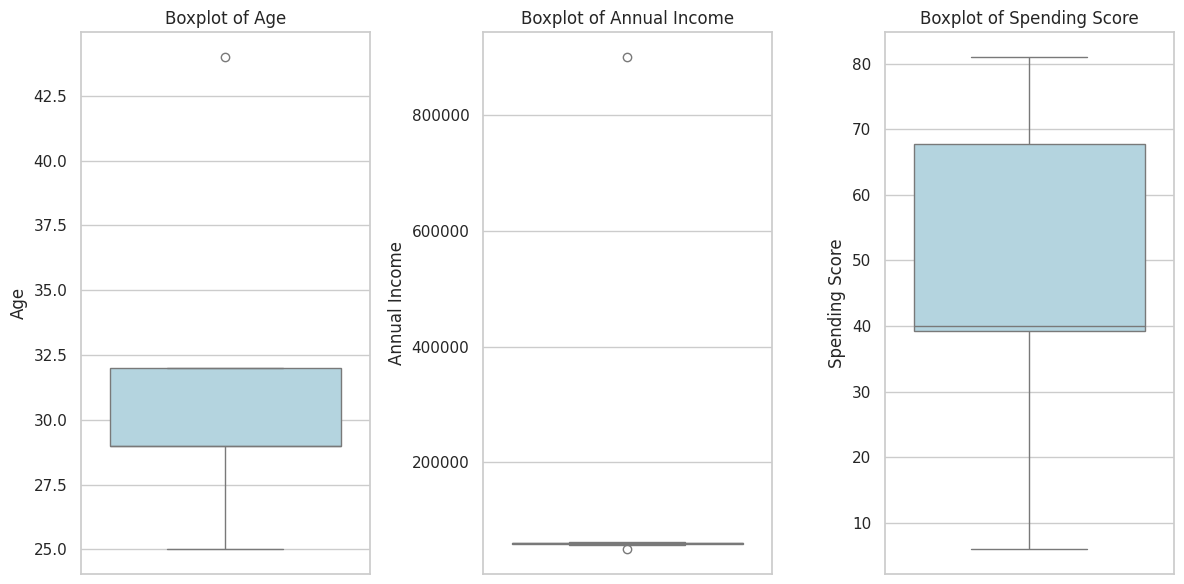

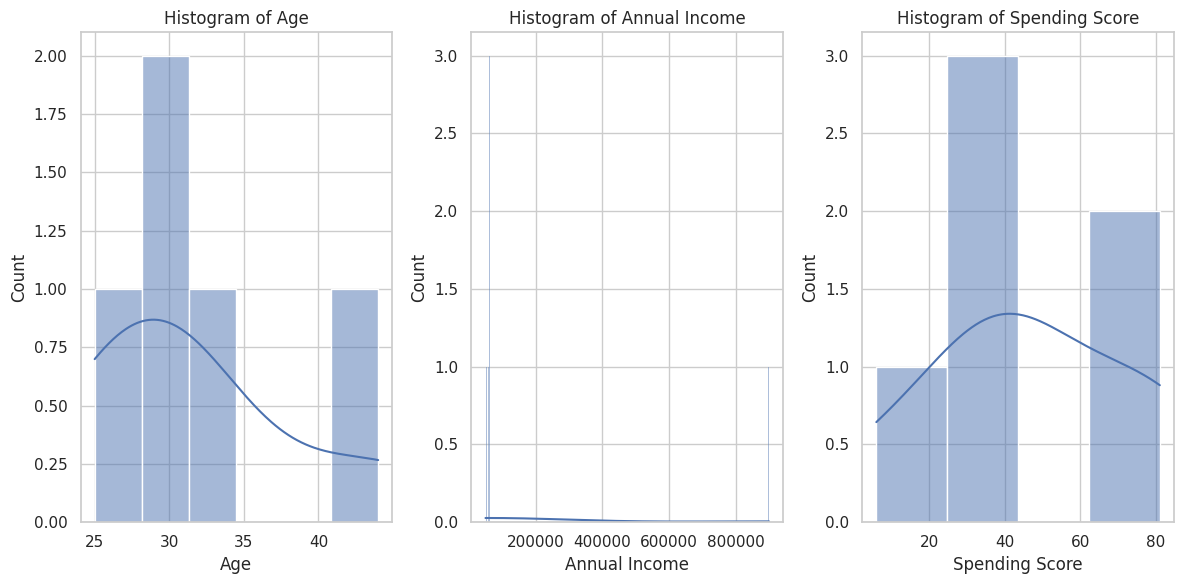

In [1]:
# -----------------------------
# IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look cleaner
sns.set(style="whitegrid")

# -----------------------------
# LOAD YOUR DATA
# -----------------------------
# Replace with your dataset path or upload using Colab's file uploader
# Example:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('your_file.csv')

# Sample structure (remove this when using your real dataset)
df = pd.DataFrame({
    "CustomerID": [1,2,3,4,5,5],
    "Name": ["A","B","C","D","E","E"],
    "Age": [25, 44, 32, None, 29, 29],
    "Gender": ["Male", "Female", None, "Male", "Female", "Female"],
    "Annual Income": [50000, 62000, 58000, 900000, 61000, 61000],
    "Spending Score": [39, 81, 6, 77, 40, 40]
})

# -----------------------------
# VISUAL EXPLORATION
# -----------------------------
numeric_cols = ["Age", "Annual Income", "Spending Score"]

# -----------------------------
# BOX PLOTS
# -----------------------------
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# -----------------------------
# HISTOGRAMS
# -----------------------------
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


# Summary

After the full cleaning pipeline:

Dataset contains no duplicates

All missing values resolved using statistically appropriate methods

Outliers identified and treated via IQR and Winsorisation

Visual clarity improved, supporting further modelling or segmentation tasks

Data is now fully prepared for machine-learning workflows and analytics use cases